In [558]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")  
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd 
import plotly.express as px
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)

In [559]:
# Import dataset

airport_df = pd.read_csv('./data/Airports2.csv')

In [560]:
airport_df.columns

Index(['Origin_airport', 'Destination_airport', 'Origin_city',
       'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance',
       'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long'],
      dtype='object')

In [561]:
airport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606803 entries, 0 to 3606802
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin_airport          object 
 1   Destination_airport     object 
 2   Origin_city             object 
 3   Destination_city        object 
 4   Passengers              int64  
 5   Seats                   int64  
 6   Flights                 int64  
 7   Distance                int64  
 8   Fly_date                object 
 9   Origin_population       int64  
 10  Destination_population  int64  
 11  Org_airport_lat         float64
 12  Org_airport_long        float64
 13  Dest_airport_lat        float64
 14  Dest_airport_long       float64
dtypes: float64(4), int64(6), object(5)
memory usage: 412.8+ MB


In [562]:
# let's see some random records
airport_df.sample(7)

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
457713,PVD,EWR,"Providence, RI","Newark, NJ",2082,3942,38,160,1992-02-01,1507673,16930924,41.732601,-71.420403,40.692501,-74.168701
1554782,LCH,BPT,"Lake Charles, LA","Beaumont, TX",27,34,1,49,2000-04-01,193463,384688,30.126101,-93.223297,29.950800,-94.020699
1419277,ELP,PHX,"El Paso, TX","Phoenix, AZ",1247,2480,20,347,2009-02-01,751296,4364094,31.807199,-106.377998,33.434299,-112.012001
779740,RDU,ORD,"Raleigh, NC","Chicago, IL",41,108,1,647,1996-04-01,674409,17287860,35.877602,-78.787498,41.978600,-87.904800
1025783,ORD,ELP,"Chicago, IL","El Paso, TX",5756,8615,62,1236,1996-03-01,17287860,674005,41.978600,-87.904800,31.807199,-106.377998
43037,BUF,FNT,"Buffalo, NY","Flint, MI",34,34,1,254,2002-08-01,1158368,438775,42.940498,-78.732201,42.965401,-83.743599
1961423,STL,BWI,"St. Louis, MO","Baltimore, MD",6747,8568,63,737,2005-08-01,2773155,2649586,38.748699,-90.370003,39.175400,-76.668297


In [563]:
# Null values
airport_df.isna()

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3606799,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3606800,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3606801,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [564]:
# Count of null values for each column
airport_df.isna().sum()

# Latitude and longitude present null values. However, these variables are not that relevant for our analysis

Origin_airport               0
Destination_airport          0
Origin_city                  0
Destination_city             0
Passengers                   0
Seats                        0
Flights                      0
Distance                     0
Fly_date                     0
Origin_population            0
Destination_population       0
Org_airport_lat           6954
Org_airport_long          6954
Dest_airport_lat          6807
Dest_airport_long         6807
dtype: int64

In [565]:
airport_df.count()

Origin_airport            3606803
Destination_airport       3606803
Origin_city               3606803
Destination_city          3606803
Passengers                3606803
Seats                     3606803
Flights                   3606803
Distance                  3606803
Fly_date                  3606803
Origin_population         3606803
Destination_population    3606803
Org_airport_lat           3599849
Org_airport_long          3599849
Dest_airport_lat          3599996
Dest_airport_long         3599996
dtype: int64

In [566]:
# Let's check the count for each component (including NA values)
airport_df['Fly_date'].str.len().value_counts(dropna=False) 

10    3606803
Name: Fly_date, dtype: int64

In [567]:
# investigate fly_date
airport_df['Fly_date'].unique()

array(['2008-10-01', '1990-11-01', '1990-12-01', '1990-10-01',
       '1990-02-01', '1990-03-01', '1990-01-01', '1990-09-01',
       '1990-04-01', '1990-06-01', '1990-08-01', '1990-05-01',
       '1990-07-01', '1991-12-01', '1991-02-01', '1991-11-01',
       '1991-09-01', '1991-05-01', '1991-10-01', '1991-08-01',
       '1991-06-01', '1991-03-01', '1991-04-01', '1991-01-01',
       '1991-07-01', '1992-09-01', '1992-06-01', '1992-03-01',
       '1992-08-01', '1992-10-01', '1992-12-01', '1992-02-01',
       '1992-04-01', '1992-05-01', '1992-11-01', '1992-07-01',
       '1992-01-01', '1993-02-01', '1993-04-01', '1993-03-01',
       '1993-11-01', '1993-01-01', '1993-05-01', '1993-09-01',
       '1993-12-01', '1993-06-01', '1993-10-01', '1993-08-01',
       '1993-07-01', '1994-01-01', '1994-12-01', '1994-10-01',
       '1994-06-01', '1994-09-01', '1994-05-01', '1994-04-01',
       '1994-08-01', '1994-11-01', '1994-02-01', '1994-07-01',
       '1994-03-01', '1995-09-01', '1995-11-01', '1995-

In [568]:
# Change Fly_date to datetime
airport_df['Fly_date']=pd.to_datetime(airport_df['Fly_date'])
airport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606803 entries, 0 to 3606802
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Origin_airport          object        
 1   Destination_airport     object        
 2   Origin_city             object        
 3   Destination_city        object        
 4   Passengers              int64         
 5   Seats                   int64         
 6   Flights                 int64         
 7   Distance                int64         
 8   Fly_date                datetime64[ns]
 9   Origin_population       int64         
 10  Destination_population  int64         
 11  Org_airport_lat         float64       
 12  Org_airport_long        float64       
 13  Dest_airport_lat        float64       
 14  Dest_airport_long       float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 412.8+ MB


In [569]:
# Count
airport_df['Origin_city'].value_counts(dropna=False)

Chicago, IL       186312
Atlanta, GA       131109
Dallas, TX        122835
Detroit, MI       108207
New York, NY      105732
                   ...  
Madera, CA             1
Hudson, NY             1
Portsmouth, OH         1
Statesboro, GA         1
Laconia, NH            1
Name: Origin_city, Length: 535, dtype: int64

In [570]:
airport_df['Origin_city']=airport_df['Origin_city'].str.strip()

In [571]:
# Value counts for origin city
airport_df['Origin_city'].value_counts(dropna=False)

Chicago, IL       186312
Atlanta, GA       131109
Dallas, TX        122835
Detroit, MI       108207
New York, NY      105732
                   ...  
Madera, CA             1
Hudson, NY             1
Portsmouth, OH         1
Statesboro, GA         1
Laconia, NH            1
Name: Origin_city, Length: 535, dtype: int64

In [572]:
# Analyzie data per state
# Split the column into city and state
airport_df[['Origin_city', 'State']] = airport_df['Origin_city'].str.split(', ', expand=True)

In [573]:
airport_df['State'].value_counts()

TX    326196
CA    258364
FL    249323
IL    204756
OH    189719
PA    179359
NY    177006
NC    148704
GA    144043
MI    140609
MO    122595
TN    121405
MN    106713
DC     94977
NJ     86151
AZ     85055
NV     83114
WA     76566
IN     61536
MA     57687
WI     54317
LA     50996
UT     49802
MD     49704
OR     44548
AK     40178
SC     35700
OK     31704
AL     28837
CT     27786
HI     25544
NM     25004
VA     24253
IA     22171
NE     20155
AR     19888
MT     19731
RI     16696
ME     12772
MS     12697
KS     11854
CO     11054
NH     10792
SD     10035
ND      9661
KY      7275
VT      5942
WV      4783
WY      4480
ID      4130
DE       436
Name: State, dtype: int64

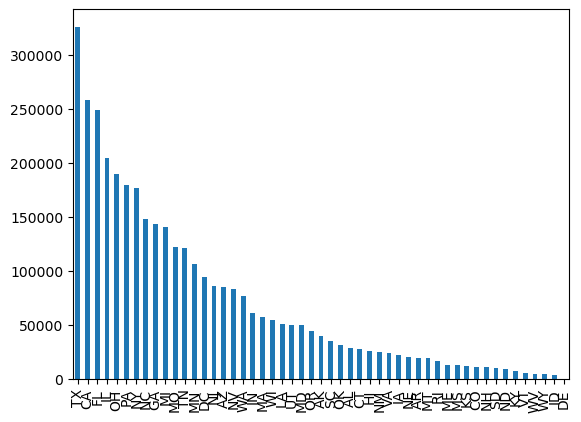

In [574]:
airport_df['State'].value_counts().plot(kind='bar');

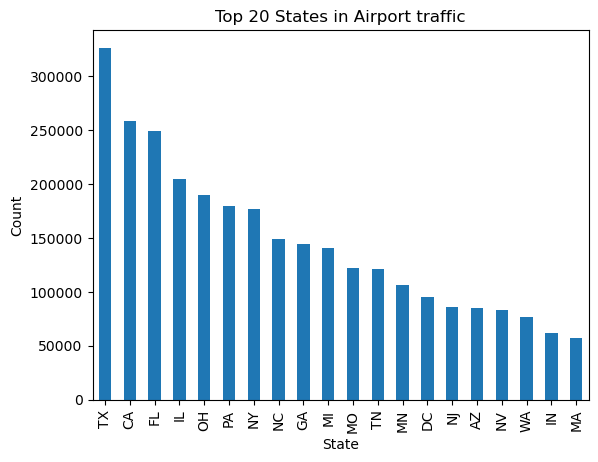

In [575]:
# Save top 20 States
top_states = airport_df['State'].value_counts().head(20)

# Plot only the top 20 states
top_states.plot(kind='bar')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 20 States in Airport traffic')

# Show the plot
plt.show()

In [576]:
# Texas, California and Florida are the state with the highest air traffic

In [446]:
## CHECK FOR OUTLIERS AND HOW TO TREAT THEM
#check for outliers in seats (seats max 853)

In [447]:
max_seats = airport_df['Seats'].max()
min_seats = airport_df['Seats'].min()
print("Max seats:", max_seats)
print("Min seats:", min_seats)

Max seats: 147062
Min seats: 0


In [448]:
# Let's see which cities has these numbers and how many flights they have

# Find the index
min_seats_index = airport_df.loc[:,'Seats'].idxmin()
max_seats_index = airport_df.loc[:,'Seats'].idxmax()

# Extract the rows
min_seats_info = airport_df.loc[min_seats_index, ['Origin_city', 'Flights']]
max_seats_info = airport_df.loc[max_seats_index, ['Origin_city', 'Flights']]

print(result_df)

  Min City =   Min Flights =  Max City =   Max Flights = 
0     Seattle               0    Honolulu            1058


In [449]:
# Group by City and sum the flights, seats and passengers columns
grouped_city = airport_df.groupby('Origin_city')['Flights', 'Seats', 'Passengers'].sum()

# Filter for rows where the sum of seats is equal to 0
filtered_grouped_city = grouped_city[grouped_city['Seats'] == 0]

print(filtered_grouped_city)

                        Flights  Seats  Passengers
Origin_city                                       
Americus                      3      0           0
Ardmore                      29      0           0
Batesville                   12      0           0
Bay City                      1      0           0
Bedford                       2      0           0
...                         ...    ...         ...
Wapakoneta                    5      0           0
Washington Court House        1      0           0
Wooster                       2      0           0
Yankton                       2      0           0
Zanesville                   11      0           0

[77 rows x 3 columns]


In [450]:
# Check if there are discrepancies between Seats and Passengers
filtered_grouped_city2 = filtered_grouped_city[filtered_grouped_city['Passengers']>0]

print(filtered_grouped_city2)
# There are not, 0 seats = 0 passengers always

Empty DataFrame
Columns: [Flights, Seats, Passengers]
Index: []


<Axes: >

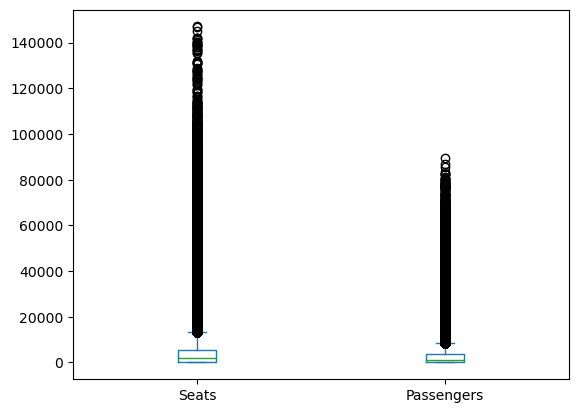

In [451]:
# BOX PLOT for DISTRIBUTION of SEATS
airport_df[['Seats', 'Passengers']].plot(kind='box')

In [452]:
# Maximum seats for a plane is 853 (https://www.aerotime.aero/articles/top-10-largest-passenger-planes-in-the-world)

# Let's see if we have some cities that have seats/flights > 853 --> that would be impossible

In [453]:
# Extra column with SEATS per FLIGHT
airport_df['Seats_per_flight'] = airport_df['Seats'] / airport_df['Flights']

In [454]:
# Filter for SEATS per FLIGHT > 853
filtered_outliers = airport_df[airport_df['Seats_per_flight'] > 853]
filtered_outliers

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,State,Seats_per_flight
8450,GFK,EKO,Grand Forks,"Elko, NV",83,1422,1,1041,2003-01-01,96132,44934,47.949299,-97.176102,40.824902,-115.792000,ND,1422.0
30652,HOU,ACT,Houston,"Waco, TX",45,215,0,178,2002-06-01,4978638,217272,29.645399,-95.278900,31.611300,-97.230499,TX,inf
34550,CLE,CAK,Cleveland,"Akron, OH",0,50,0,40,2002-11-01,2140552,699606,41.411701,-81.849800,40.916100,-81.442200,OH,inf
43096,SBN,FNT,South Bend,"Flint, MI",0,32,0,158,2002-11-01,316202,438775,41.708698,-86.317299,42.965401,-83.743599,IN,inf
52666,MIA,MIA,Miami,"Miami, FL",96,125,0,0,1992-04-01,8451688,8451688,25.793200,-80.290604,25.793200,-80.290604,FL,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555874,DCA,FLL,Washington,"Fort Lauderdale, FL",0,140,0,899,1998-06-01,9079986,4691519,38.852100,-77.037697,26.072599,-80.152702,DC,inf
3561547,SFB,FLL,Orlando,"Fort Lauderdale, FL",0,148,0,198,2002-09-01,1756852,5212602,28.777599,-81.237503,26.072599,-80.152702,FL,inf
3567726,FLL,FLL,Fort Lauderdale,"Fort Lauderdale, FL",0,400,0,0,2005-04-01,5443159,5443159,26.072599,-80.152702,26.072599,-80.152702,FL,inf
3592570,TPA,PBI,Tampa,"West Palm Beach, FL",0,19,0,174,2004-10-01,2578104,5362678,27.975500,-82.533203,26.683201,-80.095596,FL,inf


In [455]:
# we have 1 record that has 1422 seats per flight, which is impossible --> eliminate
# we see other 162 rows where seats per flight can't be calculated
# this is because some has 0 flights or 0 passengers --> impossible to have passengers and 0 flights

# We could keep records that have 0 flights and 0 passengers to spot dates and cities of inactivity,
# but it's not relevant for the purpose of our analysis

# Seen the total of 3 million observations, we can eliminate these outliers

In [456]:
# Eliminate outliers
airport_df = airport_df[~airport_df.isin(filtered_outliers)].dropna()

In [457]:
# Validation
airport_df.count()

#We have 163 rows less than the original database

Origin_airport            3583071
Destination_airport       3583071
Origin_city               3583071
Destination_city          3583071
Passengers                3583071
Seats                     3583071
Flights                   3583071
Distance                  3583071
Fly_date                  3583071
Origin_population         3583071
Destination_population    3583071
Org_airport_lat           3583071
Org_airport_long          3583071
Dest_airport_lat          3583071
Dest_airport_long         3583071
State                     3583071
Seats_per_flight          3583071
dtype: int64

In [458]:
# most popular destinations/cities
#correlation between origin city and traffic in the respective airport
#longer flights have more passenegers 

# We could expect more flights in between cities with high population

#Check for any temporal trends in the data. 

#Visualize the airports on a map to understand the distribution of flights.

In [460]:
#groupby date per sum of passengers
airport_df1 = airport_df.groupby('Fly_date')['Passengers'].sum()

In [461]:
# Reset index to sort values
df = airport_df1.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fly_date    240 non-null    datetime64[ns]
 1   Passengers  240 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [462]:
# Sort values
df = df.sort_values(by='Fly_date')
df

,Fly_date,Passengers
0,1990-01-01,27601308.0
1,1990-02-01,27006768.0
2,1990-03-01,32943771.0
3,1990-04-01,31172398.0
4,1990-05-01,31199271.0
...,...,...
235,2009-08-01,48264634.0
236,2009-09-01,41320369.0
237,2009-10-01,45036332.0
238,2009-11-01,41673685.0


In [463]:
#groupby year
grouped_df1 = df.groupby(df['Fly_date'].dt.to_period("Y"))['Passengers'].sum().reset_index()
grouped_df1

,Fly_date,Passengers
0,1990,370351682.0
1,1991,366617228.0
2,1992,383290193.0
3,1993,390950463.0
4,1994,425984733.0
5,1995,441473415.0
6,1996,467655987.0
7,1997,481754901.0
8,1998,491766416.0
9,1999,511155321.0


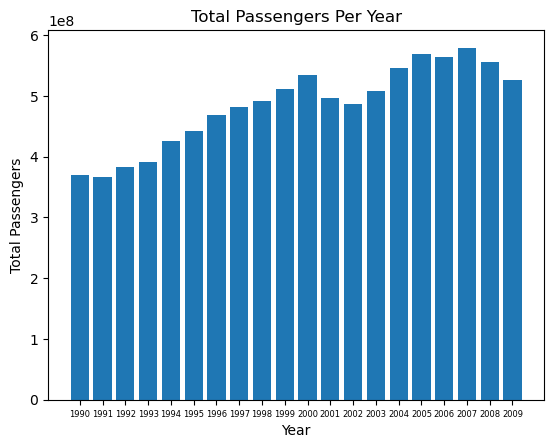

In [464]:
#convert string
grouped_df1['Fly_date'] = grouped_df1['Fly_date'].astype(str)

# Create a bar chart
plt.bar(grouped_df1['Fly_date'], grouped_df1['Passengers'])
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.title('Total Passengers Per Year')
plt.xticks(fontsize=6)

plt.show()

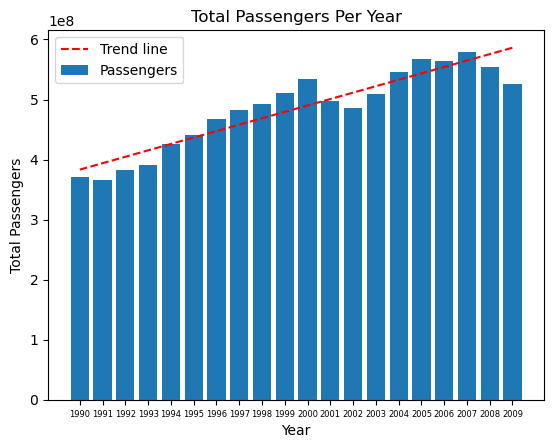

In [465]:
# Create a bar chart
plt.bar(grouped_df1['Fly_date'], grouped_df1['Passengers'], label='Passengers')
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.title('Total Passengers Per Year')
plt.xticks(fontsize=6)

# Calculate the trend line
z = np.polyfit(grouped_df1.index, grouped_df1['Passengers'], 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(grouped_df1['Fly_date'], p(grouped_df1.index), 'r--', label='Trend line')

plt.legend()
plt.show()

In [466]:
# we see a steady growth across the years, with a significant drop from 2001 to 2003 most likely due to 9/11

In [467]:
#groupby aiport of origin
#check cities where the occupancy rate per seat is higher

In [468]:
#occupancy rate

airport_df['OccupancyRate'] = airport_df['Passengers'] / airport_df['Seats']

In [469]:
#groupby date per sum of passengers
airport_df2 = airport_df.groupby('Destination_city')['OccupancyRate'].mean()
airport_df2

Destination_city
Aberdeen, SD      0.390127
Abilene, TX       0.656419
Akron, OH         0.583946
Alamogordo, NM    0.214064
Albany, GA        0.520565
                    ...   
Wilmington, OH    0.114875
Worcester, MA     0.468529
Yakima, WA        0.538743
Youngstown, OH    0.400280
Yuma, AZ          0.504951
Name: OccupancyRate, Length: 399, dtype: float64

In [470]:
# Sort by higher occupancy rate
airport_df2_sorted_desc = airport_df2.sort_values(ascending=False)
airport_df2_sorted_desc

Destination_city
Albany, OR       0.888889
Elko, NV         0.812299
Honolulu, HI     0.756534
Las Vegas, NV    0.723782
Orlando, FL      0.716293
                   ...   
Racine, WI            NaN
Salinas, CA           NaN
Sandusky, OH          NaN
Ukiah, CA             NaN
Uvalde, TX            NaN
Name: OccupancyRate, Length: 399, dtype: float64

In [471]:
# Point out nulls
filtered_nulls = airport_df2_sorted_desc[airport_df2_sorted_desc.isnull()]
filtered_nulls

Destination_city
Ardmore, OK      NaN
Atlanta, GA      NaN
Columbus, IN     NaN
Crossville, TN   NaN
Fairbanks, AK    NaN
Frankfort, KY    NaN
La Grande, OR    NaN
Madera, CA       NaN
New York, NY     NaN
Nogales, AZ      NaN
Racine, WI       NaN
Salinas, CA      NaN
Sandusky, OH     NaN
Ukiah, CA        NaN
Uvalde, TX       NaN
Name: OccupancyRate, dtype: float64

In [473]:
# Eliminate nulls
airport_df2_sorted_desc = airport_df2_sorted_desc[~airport_df2_sorted_desc.isin(filtered_nulls)].dropna()
airport_df2_sorted_desc

Destination_city
Albany, OR         0.888889
Elko, NV           0.812299
Honolulu, HI       0.756534
Las Vegas, NV      0.723782
Orlando, FL        0.716293
                     ...   
Alexandria, MN     0.000000
Wheeling, WV       0.000000
Blytheville, AR    0.000000
Price, UT          0.000000
Jackson, MI        0.000000
Name: OccupancyRate, Length: 384, dtype: float64

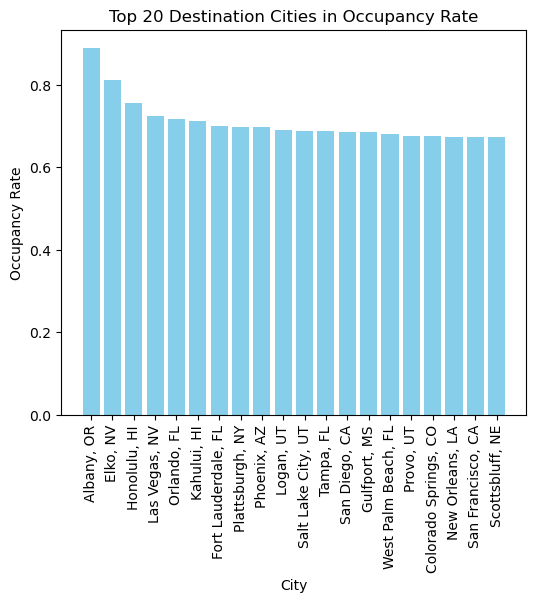

In [502]:
# Bar Plot

# Save top 20 Cities
top_cities = airport_df2_sorted_desc.head(20)

# Plot only the top 20 cities based on 'OccupancyRate'
plt.figure(figsize=(6, 5))
plt.bar(top_cities.index, top_cities, color='skyblue')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Occupancy Rate')
plt.title('Top 20 Destination Cities in Occupancy Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()



In [475]:
# Albany, Elko and Honolulu are the three cities with the highes occupacy rate
# Albany has a occupacy rate higher than 90%.
# This means that having flights to Albany will allow to optimize revenues and minimize cost since the flight are usually almost full

In [476]:
airport_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,State,Seats_per_flight,OccupancyRate
1,EUG,RDM,Eugene,"Bend, OR",41.0,396.0,22.0,103.0,1990-11-01,284093.0,76034.0,44.124599,-123.211998,44.254101,-121.150002,OR,18.0,0.103535
2,EUG,RDM,Eugene,"Bend, OR",88.0,342.0,19.0,103.0,1990-12-01,284093.0,76034.0,44.124599,-123.211998,44.254101,-121.150002,OR,18.0,0.257310
3,EUG,RDM,Eugene,"Bend, OR",11.0,72.0,4.0,103.0,1990-10-01,284093.0,76034.0,44.124599,-123.211998,44.254101,-121.150002,OR,18.0,0.152778
4,MFR,RDM,Medford,"Bend, OR",0.0,18.0,1.0,156.0,1990-02-01,147300.0,76034.0,42.374199,-122.873001,44.254101,-121.150002,OR,18.0,0.000000
5,MFR,RDM,Medford,"Bend, OR",11.0,18.0,1.0,156.0,1990-03-01,147300.0,76034.0,42.374199,-122.873001,44.254101,-121.150002,OR,18.0,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606797,STL,TBN,St. Louis,"Fort Leonard Wood, MO",292.0,1311.0,69.0,119.0,2009-06-01,2828990.0,46457.0,38.748699,-90.370003,37.741600,-92.140701,MO,19.0,0.222731
3606798,STL,TBN,St. Louis,"Fort Leonard Wood, MO",281.0,969.0,51.0,119.0,2009-02-01,2828990.0,46457.0,38.748699,-90.370003,37.741600,-92.140701,MO,19.0,0.289990
3606799,STL,TBN,St. Louis,"Fort Leonard Wood, MO",245.0,1026.0,54.0,119.0,2009-11-01,2828990.0,46457.0,38.748699,-90.370003,37.741600,-92.140701,MO,19.0,0.238791
3606800,STL,TBN,St. Louis,"Fort Leonard Wood, MO",363.0,1273.0,67.0,119.0,2009-08-01,2828990.0,46457.0,38.748699,-90.370003,37.741600,-92.140701,MO,19.0,0.285153


In [477]:
airport_df.loc[:,('Destination_city','Destination_population','Flights')]

,Destination_city,Destination_population,Flights
1,"Bend, OR",76034.0,22.0
2,"Bend, OR",76034.0,19.0
3,"Bend, OR",76034.0,4.0
4,"Bend, OR",76034.0,1.0
5,"Bend, OR",76034.0,1.0
...,...,...,...
3606797,"Fort Leonard Wood, MO",46457.0,69.0
3606798,"Fort Leonard Wood, MO",46457.0,51.0
3606799,"Fort Leonard Wood, MO",46457.0,54.0
3606800,"Fort Leonard Wood, MO",46457.0,67.0


In [478]:
# Correlation between air traffic and population in destination city

In [479]:
correlation_population_flights = airport_df['Destination_population'].corr(airport_df['Flights'])
correlation_population_flights

0.05865541037735541

In [480]:
# only 5.8% of positive correlation
# the air traffic is not strictly correlated with the population
# means it is not true that the most populated cities are the one that gets more air traffic

In [481]:
airport_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583071 entries, 1 to 3606801
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Origin_airport          object        
 1   Destination_airport     object        
 2   Origin_city             object        
 3   Destination_city        object        
 4   Passengers              float64       
 5   Seats                   float64       
 6   Flights                 float64       
 7   Distance                float64       
 8   Fly_date                datetime64[ns]
 9   Origin_population       float64       
 10  Destination_population  float64       
 11  Org_airport_lat         float64       
 12  Org_airport_long        float64       
 13  Dest_airport_lat        float64       
 14  Dest_airport_long       float64       
 15  State                   object        
 16  Seats_per_flight        float64       
 17  OccupancyRate           float64       
dtypes:

In [483]:
# Select the columns for which you want to calculate the correlation matrix
selected_columns = ['Passengers', 'Seats', 'Flights', 'Distance', 'Origin_population', 'Destination_population', 'Seats_per_flight', 'OccupancyRate']

# Calculate the correlation matrix
correlation_matrix = airport_df[selected_columns].corr()

#Display corr matrix
correlation_matrix

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Seats_per_flight,OccupancyRate
Passengers,1.000000,0.969838,0.814109,0.119871,0.102987,0.099975,0.295115,0.212933
Seats,0.969838,1.000000,0.851385,0.072331,0.102994,0.099657,0.297616,0.098570
Flights,0.814109,0.851385,1.000000,-0.079338,0.061871,0.058655,0.002235,0.063713
Distance,0.119871,0.072331,-0.079338,1.000000,0.185480,0.163478,0.312665,0.261890
Origin_population,0.102987,0.102994,0.061871,0.185480,1.000000,-0.015129,0.128693,0.030811
Destination_population,0.099975,0.099657,0.058655,0.163478,-0.015129,1.000000,0.131674,0.034465
Seats_per_flight,0.295115,0.297616,0.002235,0.312665,0.128693,0.131674,1.000000,0.057733
OccupancyRate,0.212933,0.098570,0.063713,0.261890,0.030811,0.034465,0.057733,1.000000


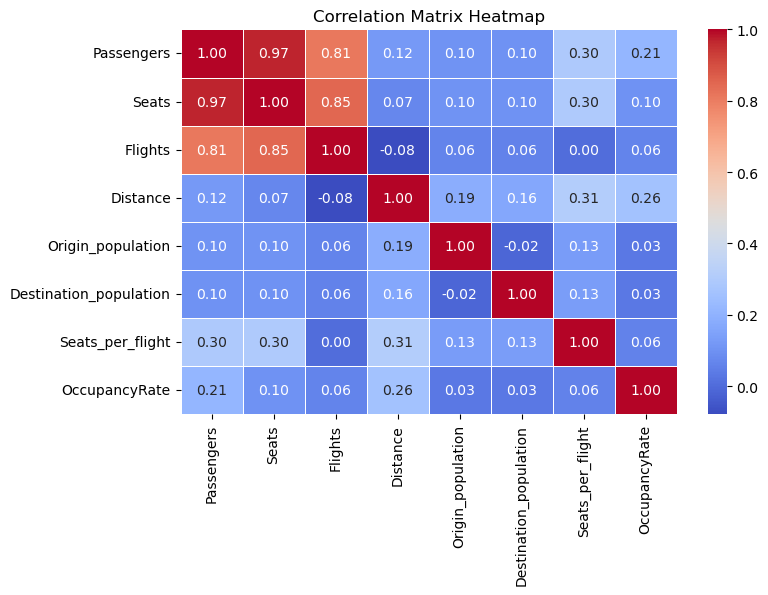

In [503]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [487]:
# 31% of correlation between Distance and Seats per flights --> plans tend to fill up for longer routes
# As it is expectable, filghts, seats and passengers are higlhy correlated
# low but negative correlation (-8%) betwen distance and flights. Means the longer the route the lower tend to be the number of flights

In [488]:

# Comparison between traffic before and after 9/11

# Comparing year 2000 with 2002

In [556]:
# Group by 'State' and sum the 'Flights'
state_flight_count = airport_df.groupby('State')['Flights'].count()

In [557]:
!pip install plotly
import plotly.io as pio
import plotly.express as px
import pandas as pd

# Set the renderer to 'iframe_connected' for Jupyter Notebook
pio.renderers.default = 'iframe_connected'

# Assuming state_flight_count is your DataFrame with state and flight frequency
state_flight_count = airport_df.groupby('State')['Flights'].sum().reset_index()

# Create a choropleth map using Plotly Express
fig = px.choropleth(state_flight_count,
                    locations='State',
                    locationmode='USA-states',
                    color='Flights',
                    color_continuous_scale='YlOrRd',
                    scope='usa',  # Use 'usa' for United States map
                    title='Flight Frequency Heatmap by State')

fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)',
                           lakecolor='rgb(255, 255, 255)'))

# Show the map
fig.show()


In [535]:
!pip install plotly
import plotly.io as pio
import plotly.express as px
import pandas as pd

# Set the renderer to 'iframe_connected' for Jupyter Notebook
pio.renderers.default = 'iframe_connected'

# Assuming state_flight_count_2000 is your DataFrame with state and flight frequency
state_flight_count_2002 = airport_df_2002.groupby('State')['Flights'].sum().reset_index()

# Create a choropleth map using Plotly Express
fig = px.choropleth(state_flight_count_2002,
                    locations='State',
                    locationmode='USA-states',
                    color='Flights',
                    color_continuous_scale='YlOrRd',
                    scope='usa',  # Use 'usa' for United States map
                    title='Flight Frequency Heatmap by State in 2002')

fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)',
                           lakecolor='rgb(255, 255, 255)'))

# Show the map
fig.show()